In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


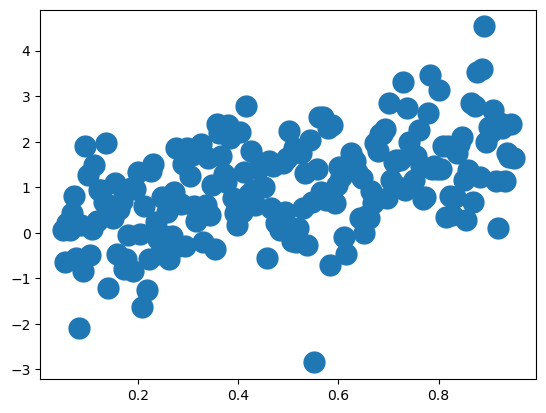

In [2]:
N_train=200 #number of data points

sigma_train=1
x=np.linspace(0.05,0.95,N_train) #train within range
s=sigma_train*np.random.randn(N_train) #noise

y=2*x+s #linear model

plt.plot(x,y,'o',ms=15,label='Training')

usually we don't generate data, this is only for demo purposes. Ususally we are just given this data and have to find the parameters (theta) that will fit it 

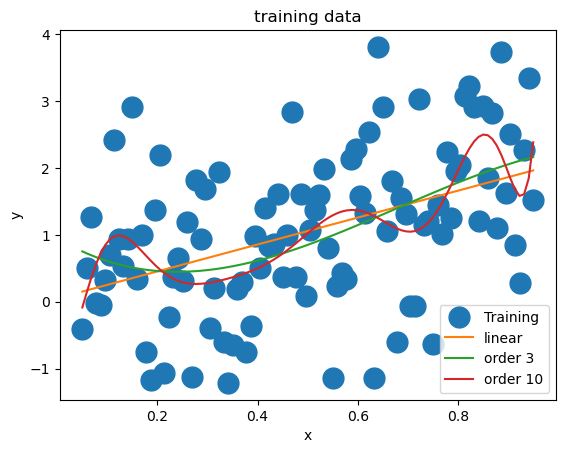

In [3]:
N_train=100
sigma_train=1
x=np.linspace(0.05,0.95,N_train) #train within range
s=sigma_train*np.random.randn(N_train) #noise
y=2*x+s #linear model


clf = linear_model.LinearRegression()
# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)


# Predict values
y_pred = clf.predict(x[:, np.newaxis])

#Polynomial Regression order 3

poly3 = PolynomialFeatures(degree=3)
X = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

Xplot=poly3.fit_transform(x[:,np.newaxis])
y_pred3=clf3.predict(Xplot)

#order 10
poly10 = PolynomialFeatures(degree=10)
X = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X,y)

Xplot=poly10.fit_transform(x[:,np.newaxis])
y_pred10=clf10.predict(Xplot)


plt.plot(x,y,'o',ms=15,label='Training')
plt.plot(x,y_pred,ms=5,label='linear')
plt.plot(x,y_pred3,label='order 3')
plt.plot(x,y_pred10,label='order 10')
plt.xlabel("x")
plt.ylabel("y")
plt.title("training data")
plt.legend()


Try these models on test data

ValueError: X has 4 features, but LinearRegression is expecting 11 features as input.

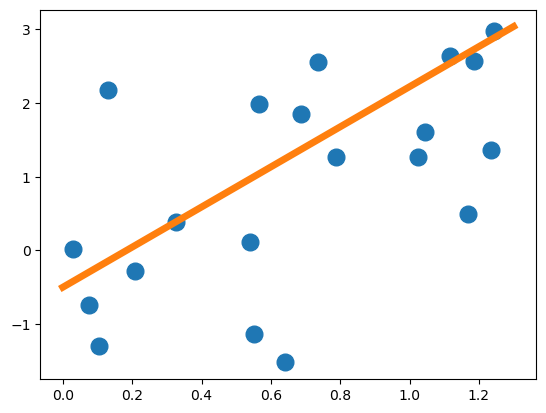

In [4]:
#generate training data
N_train=100
sigma_train=1
x=np.linspace(0.05,0.95,N_train) #train within range
s=sigma_train*np.random.randn(N_train) #noise
y=2*x+s #linear model

#initiate regression object
clf = linear_model.LinearRegression()
# Train the model using the training sets
clf.fit(x[:, np.newaxis], y)

#generate test data to see usefulness of above model
#Number of test data
N_test=20
sigma_test=sigma_train
max_x=1.3
x_test=max_x*np.random.random(N_test)
# Draw random noise
s_test = sigma_test*np.random.randn(N_test)
#Linear test points
y_test=2*x_test+s_test

#plot result
fig = plt.figure() 
p1=plt.plot(x_test,y_test.transpose(), 'o', ms=12, label='Test',linewidth=5)

#design matrix
x_plot=np.linspace(0,max_x, 200)
# Predict values for the test data
y_pred = clf.predict(x_plot[:, np.newaxis])

#plot linear model against test data
p2=plt.plot(x_plot,y_pred, label='linear',linewidth=5)

#order 3
poly3= PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(x[:,np.newaxis])
clf3 = linear_model.LinearRegression()
clf3.fit(X,y)

X3_test = poly3.fit_transform(x_plot[:,np.newaxis])
y_pred3=clf3.predict(X3_test)
p3=plt.plot(x_plot,y_pred3, label='3rd order',linewidth=5)

#order 10
poly10= PolynomialFeatures(degree=10)
X10 = poly10.fit_transform(x[:,np.newaxis])
clf10 = linear_model.LinearRegression()
clf10.fit(X10,y)

X10_test = poly10.fit_transform(x_plot[:,np.newaxis])
y_pred10=clf10.predict(X10_test)
p10=plt.plot(x_plot,y_pred10, label='10th order',linewidth=5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("test data")
plt.legend()
plt.ylim((-6,12))
plt.show()


    

We compute the mse for models of varying complexity and plot the results

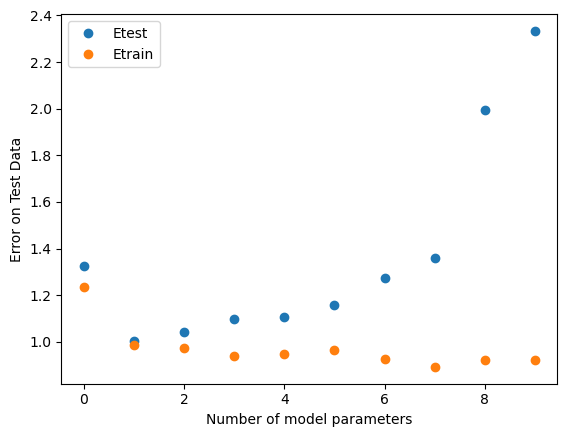

In [27]:
#Polynomial Regression
Etrain=[]
Etest=[]
for d in range(0,10):
    mse_train=[]
    mse_test=[]
    for i in range(100):
        #generate training data
        N_train=100
        sigma_train=1
        x=np.linspace(0.05,0.95,N_train) #train within range
        s=sigma_train*np.random.randn(N_train) #noise
        y=2*x+s #linear model

        #generate test data
        N_test=20
        sigma_test=sigma_train
        max_x=1
        x_test=max_x*np.random.random(N_test)
        s_test = sigma_test*np.random.randn(N_test)#noise
        y_test=2*x_test+s_test

        poly= PolynomialFeatures(degree=d)
        X = poly.fit_transform(x[:,np.newaxis])
        clf = linear_model.LinearRegression()
        clf.fit(X,y)
        y_pred_train=clf.predict(X)

        X_test = poly.fit_transform(x_test[:,np.newaxis])
        y_pred_test=clf.predict(X_test)
        
        #mse TRAIN data
        res=mean_squared_error(y,y_pred_train)
        mse_train.append(res)

        #mse TEST data
        res2=mean_squared_error(y_test,y_pred_test)
        mse_test.append(res2)
    
    mse_train_av=np.mean(mse_train)
    Etrain.append(mse_train_av)
    mse_test_av=np.mean(mse_test)
    Etest.append(mse_test_av)

#plot the mse against # of model parameters
Etest_array=np.array(Etest)
Etrain_array=np.array(Etrain)

complx=[d for d in range(0,10)]
plt.plot(complx,Etest_array,'o',label='Etest')
plt.plot(complx,Etrain_array,'o',label='Etrain')

plt.xlabel("Number of model parameters")
plt.ylabel("Error on Test Data")
plt.legend()


Model Complexity

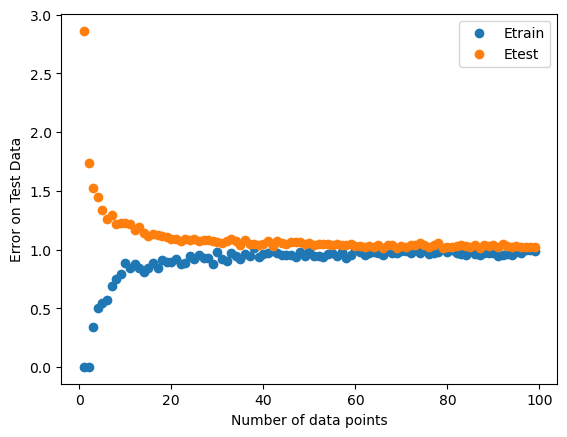

In [15]:
sigma_train=1
Etrain=[]
Etest=[]
for N_train in range(1,100):
    mse=[]
    mse2=[]
    for i in range(100): #repeat and average
        x=np.linspace(0.05,0.95,N_train) #train within range
        s=sigma_train*np.random.randn(N_train) #noise
        y=2*x+s #linear model

        clf = linear_model.LinearRegression()
        # Train the model using the training sets
        clf.fit(x[:, np.newaxis], y)

        # Predict values for TRAINING
        y_pred_train = clf.predict(x[:, np.newaxis])

        #compute mse TRAINING
        res=mean_squared_error(y,y_pred_train)
        mse.append(res)

        #generate test data
        #Number of test data
        N_test=200
        sigma_test=sigma_train
        max_x=1
        x_test=max_x*np.random.random(N_test)
        # Draw random noise
        s_test = sigma_test*np.random.randn(N_test)
        #Linear test points
        y_test=2*x_test+s_test


        # Predict values for the TEST data
        y_pred_test = clf.predict(x_test[:, np.newaxis])
        # Compute MSE for TEST DATA
        res2=mean_squared_error(y_test, y_pred_test)
        mse2.append(res2)
        

    mse_average=np.mean(mse)
    Etrain.append(mse_average)
    mse2_average=np.mean(mse2)
    Etest.append(mse2_average)

num_dat_pts=[i for i in range(1,100)]
Etrain_arr=np.array(Etrain)
Etest_arr=np.array(Etest)
plt.plot(num_dat_pts,Etrain_arr,'o',label='Etrain')
plt.plot(num_dat_pts,Etest_arr,'o',label='Etest')

plt.xlabel("Number of data points")
plt.ylabel("Error on Test Data")
plt.legend()


